<a href="https://colab.research.google.com/github/gesielrios/soudevcon-pyspark-ml/blob/main/notebooks/dia-2/01-ml-foundation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir no Colab"/>
</a>

<p align="center">
    <img src="https://soudevcon.com.br/wp-content/uploads/2025/01/logo-soudevcon-1000-branco.png" width="300px"/><br><br>
</p>

## SouDevCon - 2025
### A Celebração das Linguagens de Programação!

# Aprendizado de Máquina com Dados em Larga Escala.

__Conteúdo:__

- Parte I: Fundamentos de Machine Learning
- Parte II: Construção de Modelos de Machine Learning com PySpark MLlib

## Machine Learning



"Machine Learning" (Aprendizado de Máquina) é uma subárea da Inteligência Artificial (IA) que desenvolve algoritmos capazes de aprender padrões a partir de dados, sem serem explicitamente programados para cada tarefa específica. Em vez de seguir instruções rígidas, os modelos de ML analisam dados históricos e fazem previsões ou decisões com base nesses dados.

- Outras definições:
  - Ciência (e a arte) da programação de computadores de modo que eles possam aprender com os dados;
  - Campo de estudo que possibilita aos computadores aprender sem explicitamente programá-los ( Arthr Samuel, 1959);
  - Alega-se que um programa de computador aprende pela experiência E em relação a algum tipo de tarefa T e alguma medida de desempenho P se ao seu desempenho em T, conforme medido por P, melhora com a experiência E. (Tom Mitchell, 1997)


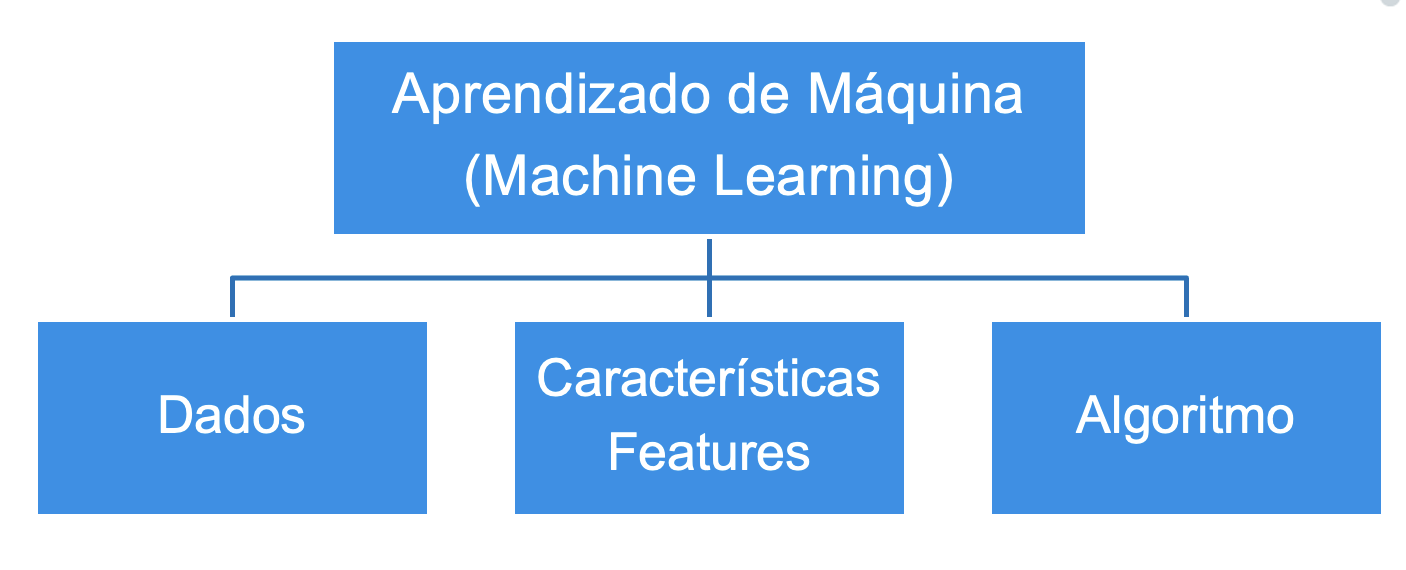

### Aprendizagem vs Inteligência

<p align="center">
    <img src="https://i.vas3k.ru/7vw.jpg" width="60%"/><br><br>
</p>

Fonte: https://vas3k.com/blog/machine_learning/

### Tipos de Aprendizado de Máquina

<p align="center">
    <img src="https://i.vas3k.ru/7vz.jpg" width="60%"/><br><br>
</p>

Fonte: https://vas3k.com/blog/machine_learning/

### Tipos de Aprendizado de Máquina

<p align="center">
    <img src="https://i.vas3k.ru/7w1.jpg" width="60%"/><br><br>
</p>

Fonte: https://vas3k.com/blog/machine_learning/

### Projeto de Aprendizado de Máquina


<p align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" width="40%"/><br><br>
</p>

## Instalando o PySpark no Google Colab

Instalar o PySpark não é um processo direto como de praxe em Python. Não basta usar um pip install apenas. Na verdade, antes de tudo é necessário instalar dependências.

In [1]:
# instalar as dependências
!apt-get install openjdk-17-jre -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz
!tar xf spark-3.5.6-bin-hadoop3.tgz
!pip install -q findspark

A próxima etapa é configurar as variáveis de ambiente, pois isso habilita o ambiente do Colab a identificar corretamente onde as dependências estão rodando.

Para conseguir “manipular” o terminal e interagir como ele, você pode usar a biblioteca os.

In [2]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.6-bin-hadoop3"

# tornar o pyspark "importável"
import findspark
findspark.init('spark-3.5.6-bin-hadoop3')

Com tudo pronto, vamos rodar uma sessão local para testar se a instalação funcionou corretamente.

In [3]:
# iniciar uma sessão local
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType


In [4]:
spark = SparkSession.builder.master('local[*]').config("spark.driver.memory", "8g").getOrCreate()

In [5]:
data = [
    ('Joh Doe', '', 'Smith', 'M', 3000),
    ('Lopes', 'Rose', '', 'M', 4000),
    ('Maria', 'Anne', 'Jones', 'F', 3000),
]

schema = (
    StructType([
        StructField('firstname', StringType(), True),
        StructField('middlename', StringType(), True),
        StructField('lastname', StringType(), True),
        StructField('gender', StringType(), True),
        StructField('salary', IntegerType(), True),
    ])
)

df = spark.createDataFrame(
    data=data,
    schema=schema
)

df.printSchema()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)



In [6]:
##Bibliotecas
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

### Aprendizado Supervisionado


Neste tipo, o modelo é treinado com um conjunto de dados rotulado, ou seja, cada entrada tem uma saída conhecida. O objetivo é aprender a relação entre entradas (features) e saídas (rótulos) para prever os rótulos de novos dados.

#### Regressão

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("new-york-city/nyc-property-sales")

print("Path to dataset files:", path)

100%|██████████| 1.81M/1.81M [00:00<00:00, 106MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/new-york-city/nyc-property-sales/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/new-york-city/nyc-property-sales/versions/1'

In [ ]:
!ls -lh {path}

total 13M
-rw-r--r-- 1 root root 13M Aug  8 00:55 nyc-rolling-sales.csv


In [ ]:
df = spark.read.csv(path + "/nyc-rolling-sales.csv", header=True, inferSchema=True)
df.limit(5).toPandas()

,_c0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17


In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- BOROUGH: integer (nullable = true)
 |-- NEIGHBORHOOD: string (nullable = true)
 |-- BUILDING CLASS CATEGORY: string (nullable = true)
 |-- TAX CLASS AT PRESENT: string (nullable = true)
 |-- BLOCK: integer (nullable = true)
 |-- LOT: integer (nullable = true)
 |-- EASE-MENT: string (nullable = true)
 |-- BUILDING CLASS AT PRESENT: string (nullable = true)
 |-- ADDRESS: string (nullable = true)
 |-- APARTMENT NUMBER: string (nullable = true)
 |-- ZIP CODE: integer (nullable = true)
 |-- RESIDENTIAL UNITS: integer (nullable = true)
 |-- COMMERCIAL UNITS: integer (nullable = true)
 |-- TOTAL UNITS: integer (nullable = true)
 |-- LAND SQUARE FEET: string (nullable = true)
 |-- GROSS SQUARE FEET: string (nullable = true)
 |-- YEAR BUILT: integer (nullable = true)
 |-- TAX CLASS AT TIME OF SALE: integer (nullable = true)
 |-- BUILDING CLASS AT TIME OF SALE: string (nullable = true)
 |-- SALE PRICE: string (nullable = true)
 |-- SALE DATE: timesta

In [ ]:
df = df.select(
    'SALE PRICE', 'BUILDING CLASS CATEGORY', 'BOROUGH', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'
)

df.show(5, truncate=False)

+----------+-------------------------------------------+-------+----------------+-----------------+
|SALE PRICE|BUILDING CLASS CATEGORY                    |BOROUGH|LAND SQUARE FEET|GROSS SQUARE FEET|
+----------+-------------------------------------------+-------+----------------+-----------------+
|6625000   |07 RENTALS - WALKUP APARTMENTS             |1      |1633            |6440             |
| -        |07 RENTALS - WALKUP APARTMENTS             |1      |4616            |18690            |
| -        |07 RENTALS - WALKUP APARTMENTS             |1      |2212            |7803             |
|3936272   |07 RENTALS - WALKUP APARTMENTS             |1      |2272            |6794             |
|8000000   |07 RENTALS - WALKUP APARTMENTS             |1      |2369            |4615             |
+----------+-------------------------------------------+-------+----------------+-----------------+
only showing top 5 rows



In [ ]:
df.printSchema()

root
 |-- SALE PRICE: string (nullable = true)
 |-- BUILDING CLASS CATEGORY: string (nullable = true)
 |-- BOROUGH: integer (nullable = true)
 |-- LAND SQUARE FEET: string (nullable = true)
 |-- GROSS SQUARE FEET: string (nullable = true)



In [ ]:
df = df.withColumn(
    'SALE PRICE',
    F.col('SALE PRICE').cast(FloatType())
).withColumn(
    'LAND SQUARE FEET',
    F.col('LAND SQUARE FEET').cast(FloatType())
).withColumn(
    'GROSS SQUARE FEET',
    F.col('GROSS SQUARE FEET').cast(FloatType())
)
df.printSchema()

root
 |-- SALE PRICE: float (nullable = true)
 |-- BUILDING CLASS CATEGORY: string (nullable = true)
 |-- BOROUGH: integer (nullable = true)
 |-- LAND SQUARE FEET: float (nullable = true)
 |-- GROSS SQUARE FEET: float (nullable = true)



In [ ]:
df.describe().show()

+-------+--------------------+-----------------------+------------------+-----------------+-----------------+
|summary|          SALE PRICE|BUILDING CLASS CATEGORY|           BOROUGH| LAND SQUARE FEET|GROSS SQUARE FEET|
+-------+--------------------+-----------------------+------------------+-----------------+-----------------+
|  count|               69987|                  84548|             84548|            58296|            56936|
|   mean|  1276456.4959349593|                   NULL|2.9987581019066094|3941.675775353369|4045.707478572432|
| stddev|1.1405254993735258E7|                   NULL|1.2897900492296346|41983.97270506183|35032.49052739489|
|    min|                 0.0|   01 ONE FAMILY DWE...|                 1|              0.0|              0.0|
|    max|        2.20999987E9|   49 CONDO WAREHOUS...|                 5|        4252327.0|        3750565.0|
+-------+--------------------+-----------------------+------------------+-----------------+-----------------+



In [ ]:
df = df.na.drop()
df.limit(5).show()

+----------+-----------------------+-------+----------------+-----------------+
|SALE PRICE|BUILDING CLASS CATEGORY|BOROUGH|LAND SQUARE FEET|GROSS SQUARE FEET|
+----------+-----------------------+-------+----------------+-----------------+
| 6625000.0|   07 RENTALS - WALK...|      1|          1633.0|           6440.0|
| 3936272.0|   07 RENTALS - WALK...|      1|          2272.0|           6794.0|
| 8000000.0|   07 RENTALS - WALK...|      1|          2369.0|           4615.0|
| 3192840.0|   07 RENTALS - WALK...|      1|          1750.0|           4226.0|
|  1.6232E7|   08 RENTALS - ELEV...|      1|          4489.0|          18523.0|
+----------+-----------------------+-------+----------------+-----------------+



In [ ]:
#label encoder
indexer = StringIndexer(
    inputCol='BUILDING CLASS CATEGORY',
    outputCol='BUILDING_CLASS_CATEGORY_IDX'
)

#variaveis explicativas (inputs)
assembler = VectorAssembler(
    inputCols=['BUILDING_CLASS_CATEGORY_IDX', 'BOROUGH', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'],
    outputCol='FEATURES'
)

lr = LinearRegression(
    featuresCol='FEATURES',
    labelCol='SALE PRICE'
)

pipeline = Pipeline(
    stages=[
        indexer,
        assembler,
        lr
    ]
)

model = pipeline.fit(df)

In [ ]:
predictions = model.transform(df)
predictions.limit(5).toPandas()

,SALE PRICE,BUILDING CLASS CATEGORY,BOROUGH,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING_CLASS_CATEGORY_IDX,FEATURES,prediction
0,6625000.0,07 RENTALS - WALKUP APARTMENTS,1,1633.0,6440.0,5.0,"[5.0, 1.0, 1633.0, 6440.0]",2.512640e+06
1,3936272.0,07 RENTALS - WALKUP APARTMENTS,1,2272.0,6794.0,5.0,"[5.0, 1.0, 2272.0, 6794.0]",2.523429e+06
2,8000000.0,07 RENTALS - WALKUP APARTMENTS,1,2369.0,4615.0,5.0,"[5.0, 1.0, 2369.0, 4615.0]",1.857708e+06
3,3192840.0,07 RENTALS - WALKUP APARTMENTS,1,1750.0,4226.0,5.0,"[5.0, 1.0, 1750.0, 4226.0]",1.833484e+06
4,16232000.0,08 RENTALS - ELEVATOR APARTMENTS,1,4489.0,18523.0,15.0,"[15.0, 1.0, 4489.0, 18523.0]",6.360529e+06


In [ ]:
evaluator = RegressionEvaluator(
    labelCol='SALE PRICE',
    predictionCol='prediction',
    metricName='rmse'
)

rmse = evaluator.evaluate(predictions)
print('RMSE:', rmse)

RMSE: 11310232.478189927


#### Classificação

In [7]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("galaxyh/kdd-cup-1999-data")

print("Path to dataset files:", path)

Download already complete (92057549 bytes).
Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/galaxyh/kdd-cup-1999-data/versions/1


In [10]:
!ls -lh {path}

total 814M
drwxr-xr-x 2 root root 4.0K Aug  8 15:26 corrected
-rw-r--r-- 1 root root 1.4M Aug  8 15:26 corrected.gz
drwxr-xr-x 2 root root 4.0K Aug  8 15:26 kddcup.data
drwxr-xr-x 2 root root 4.0K Aug  8 15:27 kddcup.data_10_percent
-rw-r--r-- 1 root root  72M Aug  8 15:27 kddcup.data_10_percent_corrected
-rw-r--r-- 1 root root 2.1M Aug  8 15:27 kddcup.data_10_percent.gz
-rw-r--r-- 1 root root 709M Aug  8 15:27 kddcup.data.corrected
-rw-r--r-- 1 root root  18M Aug  8 15:27 kddcup.data.gz
-rw-r--r-- 1 root root 1.3K Aug  8 15:27 kddcup.names
drwxr-xr-x 2 root root 4.0K Aug  8 15:27 kddcup.newtestdata_10_percent_unlabeled
-rw-r--r-- 1 root root 1.4M Aug  8 15:27 kddcup.newtestdata_10_percent_unlabeled.gz
drwxr-xr-x 2 root root 4.0K Aug  8 15:27 kddcup.testdata.unlabeled
drwxr-xr-x 2 root root 4.0K Aug  8 15:27 kddcup.testdata.unlabeled_10_percent
-rw-r--r-- 1 root root 1.4M Aug  8 15:27 kddcup.testdata.unlabeled_10_percent.gz
-rw-r--r-- 1 root root  11M Aug  8 15:27 kddcup.testdata.unlab

In [11]:
df = spark.read.csv(path + "/kddcup.data_10_percent_corrected", header=False, inferSchema=True)
df.limit(5).show(truncate=False)

+---+---+----+---+---+----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|_c0|_c1|_c2 |_c3|_c4|_c5 |_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41   |
+---+---+----+---+---+----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|0  |tcp|http|SF |181|5450|0  |0  |0  |0  |0   |1   |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |8   |8   |0.0 |0.0 |0.0 |0.0 |1.0 |0.0 |0.0 |9   |9   |1.0 |0.0 |0.11|0.0 |0.0 |0.0 |0.0 |0.0 |normal.|
|0  |tcp|http|SF |239|486 |0  |0  |0  |0  |0   |1   |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |8   |8   |0.0 |0.0 |0.0 |0.0 |1.0 |0.0 |0.0 |19  |19  |1.0 |0.0 |0.05

In [12]:
cols = [f'feature_{i}'for i in range(41)] + ['label']
df = df.toDF(*cols)
df.limit(5).show(truncate=False)

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-------+
|feature_0|feature_1|feature_2|feature_3|feature_4|feature_5|feature_6|feature_7|feature_8|feature_9|feature_10|feature_11|feature_12|feature_13|feature_14|feature_15|feature_16|feature_17|feature_18|feature_19|feature_20|feature_21|feature_22|feature_23|feature_24|feature_25|feature_26|feature_27|feature_28|feature_29|feature_30|feature_31|feature_32|feature_33|feature_34|feature_35|feature_36|feature_37|feature_38|feature_39|feature_40|label  |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------

In [13]:
categorical_cols = ['feature_1', 'feature_2', 'feature_3']
indexers = [
    StringIndexer(inputCol=col, outputCol=f'{col}_idx') for col in categorical_cols
]

label_indexer = StringIndexer(inputCol='label', outputCol='label_idx')

assembler = VectorAssembler(
    inputCols=[f'feature_{i}'for i in range(41) if i not in [1, 2, 3]] + [f'{col}_idx' for col in categorical_cols],
    outputCol='features'
)

lr = LogisticRegression(featuresCol='features', labelCol='label_idx')

pipeline = Pipeline(
    stages=indexers + [label_indexer, assembler, lr]
)

model = pipeline.fit(df)
predictions = model.transform(df)

evaluator = MulticlassClassificationEvaluator(labelCol="label_idx", metricName="accuracy")

print(f"Acurácia KDDCup99: {evaluator.evaluate(predictions):.4f}")

Acurácia KDDCup99: 0.9988


### Aprendizado Não Supervisionado



Neste tipo, os dados não possuem rótulos. O modelo tenta encontrar estruturas, padrões ou agrupamentos nos dados por conta própria.


#### Clusterização

In [7]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dbdmobile/myanimelist-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.80G/1.80G [01:10<00:00, 27.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dbdmobile/myanimelist-dataset/versions/5


In [16]:
!ls -lh $path

total 6.9G
-rw-r--r-- 1 root root  16M Aug  8 17:40 anime-dataset-2023.csv
-rw-r--r-- 1 root root 9.3M Aug  8 17:40 anime-filtered.csv
-rw-r--r-- 1 root root 4.3G Aug  8 17:43 final_animedataset.csv
-rw-r--r-- 1 root root 1.5G Aug  8 17:45 user-filtered.csv
-rw-r--r-- 1 root root  71M Aug  8 17:45 users-details-2023.csv
-rw-r--r-- 1 root root 1.1G Aug  8 17:46 users-score-2023.csv


In [20]:
df = spark.read.csv(f'{path}/anime-dataset-2023.csv', header=True, inferSchema=True)
df.limit(5).show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------------+--------------------+---------+-------+--------------------+
|            anime_id|                Name|        English name|          Other name|               Score|              Genres|            Synopsis|                Type|            Episodes|               Aired|  Premiered|         Status|           Producers|           Licensors|             Studios|              Source|            Duration|              Rating|       Rank|          Popularity|           Favorites|Scored By|Members|           Image URL|
+--------------------+--------------------+--------------------+------------------

In [18]:
df.printSchema()

root
 |-- anime_id: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- English name: string (nullable = true)
 |-- Other name: string (nullable = true)
 |-- Score: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Synopsis: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Episodes: string (nullable = true)
 |-- Aired: string (nullable = true)
 |-- Premiered: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Producers: string (nullable = true)
 |-- Licensors: string (nullable = true)
 |-- Studios: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Rank: string (nullable = true)
 |-- Popularity: string (nullable = true)
 |-- Favorites: string (nullable = true)
 |-- Scored By: string (nullable = true)
 |-- Members: string (nullable = true)
 |-- Image URL: string (nullable = true)



In [26]:
label_encoder_variables = ['Genres', 'Type', 'Studios', 'Source']
numeric_variables = ['Score', 'Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']

In [27]:
#ajustando as variaveis numericas
for val in numeric_variables:
  df = df.withColumn(
      val,
      F.col(val).cast(FloatType())
  )

df.limit(5).select(numeric_variables).printSchema()

root
 |-- Score: float (nullable = true)
 |-- Episodes: float (nullable = true)
 |-- Rank: float (nullable = true)
 |-- Popularity: float (nullable = true)
 |-- Favorites: float (nullable = true)
 |-- Scored By: float (nullable = true)
 |-- Members: float (nullable = true)



In [30]:
df = df.na.drop()

In [31]:
indexer = StringIndexer(
    inputCols=label_encoder_variables,
    outputCols=[f"{col}_label" for col in label_encoder_variables]
)

assembler = VectorAssembler(inputCols=([f"{col}_label" for col in label_encoder_variables] + numeric_variables), outputCol="features")

kmeans = KMeans(k=5, seed=42)

pipeline = Pipeline(stages=[indexer, assembler, kmeans])

model = pipeline.fit(df)

predictions = model.transform(df)
predictions.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|    8|
|         3|   19|
|         4|   97|
|         2|  439|
|         0| 3981|
+----------+-----+



In [32]:
evaluator = ClusteringEvaluator()

print(f"Silhouette Score Ecommerce Behavior: {evaluator.evaluate(predictions):.4f}")

Silhouette Score Ecommerce Behavior: 0.9004


<img src="https://images2.imgbox.com/6a/82/dZdDGMNe_o.png" width="60%"/>

---

__Licensa__

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Cc_by-nc_icon.svg/1200px-Cc_by-nc_icon.svg.png" width="20%"/>



*This work is licensed under the Creative Commons Attribution-NonCommercial 4.0 International License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.*